# Chapter 11 : 다층 퍼셉트론 모델
## 사전 지식
### 확률적 최적화 알고리즘
- MLP 등의 인공 신경망 : 주로 샘플과 피처가 모두 많은 대형 데이터셋에 적용
- 대형 데이터셋 : 알고리즘 수행 시간이 오래 걸리고 필요한 메모리가 많아 컴퓨터 연산 장치가 작동하기 어려울 때가 많음
- 확률적 최적화 알고리즘(stochastic solver) : 대형 데이터셋에 적용하기 좋은 최적화 기법
- 전체 데이터셋을 한 번에 학습하는 것이 아니라 일부 데이터셋만을 샘플링한다는 것이 기본 아이디어  
<br><br>
- 확률적 경사 하강법(stochastic gradient descent, SGD) : 가장 기본적인 확률적 최적화 알고리즘의 하나
- 데이터셋을 미니 배치(mini batch)라고 불리는 서브데이터셋으로 랜덤하게 분할한 후 순서대로 경사 하강법을 적용  
<br><br>
- sklearn.SGDClassifier 클래스 : SGD를 이용한 분류 모델 구현
- sklearn.SGDRegressor 클래스 : SGD를 이용한 회귀 모델 구현
- 하이퍼파라미터 설정에 따라 다양한 모델을 포함
    - SGDClassifier(loss = 'log') : LogisticRegression 클래스와 동일
    - SGDRegressor(loss = 'squared_error', penalty = '12') : 릿지 회귀(ridge regression) 모델과 동일  
<br><br>
- SGD : 기본적으로 비용 함수를 경사 하강법으로 해결
- Loss : 배치에서의 손실값
- Penalty : 현 시점의 파라미터 값에 따라 계산한 규제값  
$w \leftarrow w - \eta \bigg ( \frac{\partial Loss}{\partial w} + \alpha \frac{\partial Penalty}{\partial w} \bigg )$  
- 효율적이고 구현이 쉬움
- 규제 하이퍼파라미터와 이터레이션 횟수 등을 세밀하게 설정해야 학습을 잘 수행할 수 있음
- Adam(adaptive estimation) 알고리즘 : SGD와 비슷한 확률적 최적화 알고리즘, 더 세밀하게 최적화를 수행하므로 구조가 조금 더 복잡

## 1. 다층 퍼셉트론 모델이란?
- 다층 퍼셉트론(multilayer perceptron, MLP) : 생물의 신경말 구조에 착안하여 발전된 인공 신경망() 모델의 하나
- 여러 개의 레이어 or 층(layer)으로 구성
- 레이어 : 1개의 입력층(input layer), 1개의 출력층(output layer), 입력층과 출력층 사이에 있는 1개 이상의 은닉층(hidden layer)으로 구분
- 은닉층이 2개 이상인 MLP : 심층 신경망(deep neural network)의 일종

#### 뉴런의 순전파
- 입력층 : $p$개의 뉴런$(x_1, x_2, \dots, x_p)$
- 출력층 : 1개의 뉴런 $y$
- 입력층을 제외한 모든 층에서 각각의 뉴런 : 이전 층 뉴런의 함수
1. 이전 층 뉴런의 선형 결합 수행
    - 뉴런별로 적용하는 파라미터 값은 다름
2. 얻은 값은 그대로 다음 뉴런으로 전달하는 것이 아니라 활성화 함수() $g : \mathbb{R} \rightarrow \mathbb{R}$로 변환한 후 전달
    - 활성화 함수 : 생명체의 자극 전달 방식을 모방한 것
    - 기본적으로 특정 임계값 이하의 값(자극)은 전달하지 않고 버린다는 의미
        - 시그모이드 함수 $f(x) = \frac{1}{1 + e^{-x}}$
        - 하이퍼볼릭 탄젠트 함수(hyperbolic tangent) $f(x) = tanhx$
        - ReLU(rectified linear unit) 함수 $f(x) = max(0, x)$
        - 비선형 활성화 함수를 주로 사용
        - 회귀 모델에서는 최종 출력층의 활성화 함수로 선형 활성화 함수인 항등 함수(identity function) $f(x) = x$ 를 사용
        
- 출력층에 이를 때까지 이 과정을 반복
- 츨력층 : MLP 회귀 모델 or 이진 MLP 분류 모델이라면 한 개의 뉴런으로 구성
- $K$개 클래스($K$ > 2)인 다중 MLP 분류 모델이라면 $K$개의 뉴런으로 구성
- MLP 기법 : 은닉층 개수와 은닉층별 뉴런 개수, 최대 이터레이션 횟수 등을 어떻게 튜닝하는지가 성능에 큰 영향을 끼침

## 2. 다층 퍼셉트론 모델 구현하기
### 다층 퍼셉트론 모델의 이론
- MLP : 단순한 형태의 수많은 퍼셉트론(perceptron)을 연결하는 구조
- 파라미터가 주어졌을 떄 입력은 출력까지 순방향으로 이루어짐
- 입력값으로 계산한 출력값과 실제 목푯값을 비교한 후 오차를 역전파(backpropagate)하여 파라미터를 수정
- 피처 $x = (x_1, x_2, \dots, x_p) \in \mathbb{R}^p$
- 목푯값 $y$ : 연속값(회귀) or {0, 1}(이진 분류)인 클래스 레이블 가짐
- 은닉층 하나로 설정, 하나의 뉴런만 두도록 함  

0. 파라미터를 랜덤하게 초기화
    - Xavier 초기화 or He 초기화 등 학습이 잘 이루어지도록 하는 초기화 방법 제안  
<br><br>    
1. 주어진 파라미터 값에 데이터를 적용하여 예측 클래스 or 예측값을 계산
    - 모델 파라미터 : $W_1 \in \mathbb{R}^p$, $w_2, b_1, b_2 \in \mathbb{R}$
    - $W_1$, $w_2$ : 각각 입력층과 은닉층에서 다음 층으로 진행할 때의 선형 가중치
    - $b_1$, $b_2$ : 각각의 선형 결합 후 더해지는 편향(bias)항
    - 은닉층의 활성화 함수 : 하이퍼볼릭 탄젠트 함수 사용  
    $g(z) = tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$  
    - 입력층에서 첫 번째 은닉층까지 선형 변환 후 활성화 단계를 거치면 값 $g(W_1^Tx + b_1)$가 얻어짐
    - 얻어진 값이 츨력층으로 가면서 다시 한번 선형 변환  
    $f(x) = w_2g(W_1^Tx + b_1) + b_2$  
        - MLP 분류 모델과 MLP 회귀 모델 모두 동일
        
    - $f$를 변환하는 과정이 문제의 종류에 따라 달라짐
        - 이진 분류 모델 : $f \in (-\infty, \infty)$의 범위를 [0, 1]로 단조 변화하여 출력값을 확률로 나타냄
            - 시그모이드 함수를 활성화 함수로 적용  
            $g_{output}(z) = \frac{1}{1 + e^{-z}}$
            - 최종 출력에 해당하는 확률값 0.5 이상 : 출력값을 1로 간주
            - 최종 출력에 해당하는 확률값 0.5 미만 : 출력값을 0으로 간주
            - 파라미터가 정해졌다고 전제할 때의 출력 클래스를 결정할 수 있게 됨
        - 회귀 모델 : 출력층에 도달한 값 $f$를 변환하는 대신 항등 함수를 활성화 함수로 사용하여 선형 결합값을 최종 출력값으로 결정

**다중 분류의 MLP 모델**
- 클래스 개수가 2보다 큰 다중 분류 : MLP 모델의 출력층에서 $f(x)$를 $\mathbb{R}$이 아닌 $\mathbb{R}^K$에 대응
- 이후 각각의 원소에 대하여 소프트맥스 함수(softmax funstion)를 적용
    - 소프트맥스 함수 : $\mathbb{R}^K \rightarrow \mathbb{R}^K$의 함수
    - 실수 전체에서 정의된 벡터를 각각 값이 [0, 1] 사이이고 합이 1인 벡터로 단조 변환한 것  
    $softmax(z)_i = \frac{exp(z_i)}{\sum_{i = 1}^{K} exp(z_i)}$
    - 시그모이드 함수 : $K$ = 2일 때의 소프트맥스 함수와 같은 기능 수행
    - $z_i$ : 소프트맥스 함수의 입력 벡터 중 $i$번째 차원의 원소
        - 해당 값이 클수록 해당 샘플이 $i$번째 클래스에 해당할 확률이 높아지게끔 모델링됨
    - 확률 벡터 : 각각의 값이 0과 1 사이인 $K$타원 벡터
        - 가장 높은 값인 차원에 대응하는 클래스를 최종 출력 클래스로 결정
<br><br>
2. 예측한 클래스 or 값과 실제 클래스 or 값을 비교한 후 비용 함수 계산
    - 비용 함수 : 분류인지 회귀인지에 따라 달라짐
        - 분류 : 크로스 엔트로피(cross-entropy) 함수 사용
            - 벡터 $w_{total} = W_1, w_2, b_1, b_2$
            - 목푯값 $y_i$, 예측값 $\hat{y}_i$  
            $J(w_{total}) = \displaystyle \sum_{i = 1}^{n} (-y_i ln \hat{y}_i - (1 - y_i) ln(1 - \hat{y}_i)) + \alpha \parallel w_{total} \parallel _2^2$
            - $\alpha \parallel w_{total} \parallel_2^2$ : 모델의 복잡도를 제어하는 L2 규제 페널티
            - $\alpha$ : 0 시앗의 값, 값이 클수록 복잡도에 대하여 큰 페널티가 부여됨
            
        - 회귀 : 제곱 오차 지용 함수(squared error cost function) 사용
            - 평균 제곱 오차(mean squared error, MSE)와 동일한 개념의 비용 함수  
            $J(w_{total}) = \frac{1}{2} \parallel \hat{y} - y \parallel_2^2 + \frac{\alpha}{2} \parallel w_{total} \parallel_2^2$  
<br><br>
3. 비용 함수를 줄이는 방향으로 1단계와 2단계를 반복하며 최적화를 진행
    - 계산한 비용 함수를 이용해 경사 하강법을 기반으로 파라미터의 업데이트를 수행
    - 이터레이션 단계 $t$, 학습률 $\varepsilon$  
    $w_{total}^{(t + 1)} = w_{total}^{(t)} - \varepsilon \nabla Loss_{w_{total}}^{(t)}$  
    - 여러 층에 대한 각각의 지점에서 체인 룰(chain rule)을 적용하여 얻음
        - 오차가 반대 방향으로 전파되는 것 같다 $\rightarrow$ 오차 역전파(error backpropagation)
        - 비용 함수를 계산하는 1~2단계 과정은 정방향으로 진행 $\rightarrow$ 순전파(forward propagation)  
        
#### MLP 모델의 학습 과정
1. 파라미터를 랜덤하게 초기화
2. 정지 규칙에 도달할 때까지 반복
    - 순전파로 비용 함수 계산
    - 오차 역전파를 적용해 비용 함수를 줄이는 방향으로 파라미터를 업데이트
    - 업데이트한 파라미터로 순전파를 수행해 비용 함수 계산  
    
- 정지 규칙 : 사전 지정한 최대 이터레이션 횟수에 도달 or 비용 함수의 개선이 특정 임계값 이하가 되는 등

#### 시간 복잡도
- $n$개의 관측값, $p$개의 피처, 목표 클래스의 레이블 수 $K$
- 각각 $h$개의 뉴런으로 구성된 $m$개의 은닉층을 구성하고 $i$회의 이터레이션을 수행했다고 가정
- 학습에 걸리는 전체 시간 복잡도는 역전파 과정에 의해 결정됨
- 오차 역전파 과정의 시간 복잡도 : $O(nph^mKi)$ = 전체 학습의 시간 복잡도
- 과적합 가능성이 있으므로 학습을 끝까지 마치는 대신 다양한 조기 종료 규칙을 추가하는 것이 좋음

### 다층 퍼셉트론 모델 구현하기
- 초기화 이후 순전파와 오차 역전파를 반복
- 최대 이터레이션에 도달 or 정지 조건을 만족할 시 학습을 종료하는 방법으로 구현
- 큰 데이터를 가정 : 모든 샘플이 이용하여 파라미터 업데이트를 하는 대신 SGD 등의 확률적 최적화 알고리즘을 이용해 일부 샘플만을 사용

## 3. 패키지로 표현하기
- sklearn.neural_network.MLPClassifier 클래스 : MLP 분류 모델 구현
- 확률적 최적화 알고리즘인 SGD or Adam일 때와 비확률적 최적화 알고리즘일 때 적용할 수 있는 하이퍼파라미터의 구성이 조금씩 달라짐
- 샘플 개수: $n$
- hidden_layer_sizes
    - 주요값 : tuple
    - 기본값 : (100, )
    - 의미 : 튜플(tuple) 순서대로 해당 은닉층의 뉴런의 수를 의미
- activation
    - 주요값 : 'identity', 'logistic', 'tanh', 'relu'
    - 기본값 : 'relu'
    - 의미 : 은닉층에서 사용할 활성화 함수 선택
        - 'identity' : 활성화 과정 없이 입력값을 그대로 반환하는 항등 함수
        - 'logistic' : 시그모이드 함수
        - 'tanh' : 하이퍼폴릭 탄젠트 함수
        - 'relu' : ReLU 함수
- solver
    - 주요값 : 'lbfgs', 'sgd', 'adam'
    - 기본값 : 'adam'
    - 의미 : 최적화 알고리즘 선택
        - 'lbfgs' : L-BFGS-B 알고리즘
        - 'sgd' : SGD 알고리즘
        - 'adam' : Adam 알고리즘
- alpha
    - 주요값 : float $\geq$ 0
    - 기본값 : 0.0001
    - 의미 : L2 규제항의 계수
- batch_size
    - 주요값 : 'auto', int
    - 기본값 : 'auto'
    - 의미 ; 미니 배치(mini-batch)의 크기를 결정하여 확률적 최적화 알고리즘에서만 적용
        - 'auto' : min(200, n)의 미니 배치 크기 사용
- learning_rate_init
    - 주요값 : float > 0
    - 기본값 : 0.001
    - 의미 : 확률적 최적화 알고리즘에서의 초기 학습률
- max_iter
    - 주요값 : int > 0
    - 기본값 : 200
    - 의미 : 에포크(epoch)의 최대 횟수
        - tol에 따른 학습 조기 종료가 일어나지 않는다면 max_iter번 후 학습 종료
        - 확률적 최적화 알고리즘에서는 max_iter가 파라미터의 업데이트 횟수가 아니라 에포크의 수라는 것에 유의
- shuffle
    - 주요값 : bool
    - 기본값 : True
    - 의미 : 확률적 최적화 알고리즘에서 이터레이션마다 데이터 셔플링(data shuffling) 여부를 결정
- random_state
    - 주요값 : int
    - 기본값 : None
    - 의미 : 랜덤성의 제어
        - 학습 파라미터 초기화 early_stopping이 True일 때의 검증 데이터셋 분할
        - solver가 'sgd' or 'adam'일 경우 배치 추출 등에서의 랜덤성을 제어하는 데 적용
- tol
    - 주요값 : float
    - 기본값 : 1e-4
    - 의미 : 학습 조기 종료에 관련된 허용 오차
        - 손실 함수의 값이나 성능이 n_iter_no_change번 이터레이션 동안 tol 이상만큼 향상하지 않고 learning_rate가 'adaptive'가 아닌 경우 학습이 종료됨
- early_stopping
    - 주요값 : bool
    - 기본값 : False
    - 의미 : 확률적 최적화 알고리즘에서만 적용되며, 학습 조기 종료를 판단할 때 검증 데이터셋을 사용할 것인지를 선택
        - True : n_iter_no_change회 에포크 동안 검증 데이터셋에서 tol만큼의 개선이 없다면 학습 조기 종료
        - False : n_iter_no_change회 에포크 동안 학습 데이터셋 전체에서 tol만큼의 개선이 없다면 학습 조기 종료
- validation_fraction
    - 주요값 : 0 < float < 1
    - 기본값 : 0.1
    - 의미 : early_stopping이 True일 때만 적용하여 학습 조기 종료 판단 시 학습 데이터셋 중 검증 데이터셋의 비율 설정
- n_iter_no_change
    - 주요값 : int
    - 기본값 : 10
    - 의미 : 확률적 최적화 알고리즘에서 tol 개선 여부에 따라 학습 조기 종료를 판단할 에포크의 수
    
- 최적화 알고리즘으로 SGD(solver = 'sgd')를 선택하면 하이퍼파라미터 추가로 사용 가능
- learning_rate
    - 주요값 : 'constant', 'invscaling', 'adaptive'
    - 기본값 : 'constant'
    - 의미 : 학습률 크기 설정
        - 'constant' : learning_rate_init값 계속 적용
        - 'invscaling' : 학습률을 점진적으로 감소
            - $t$번째 단계에서 $\frac{learning_rate_init}{t^{power_t}}$로 설정
        - 'adaptive' : 학습 데이터셋의 비용 함수 값이 계속해서 적절히 감소하는 한 학습률을 learning_rate_init로 유지
            - 연속한 두 에포크에서 학습 데이터셋의 손실이 tol 이하로 감소하지 않거나 early_stopping = True에서 검증 데이터셋 기준 성능이 tol만큼 증가하지 못한다면 현재의 학습률을 1/5배로 감소
- power_t
    - 주요값 : float > 0
    - 기본값 : 0.5
    - 의미 : learning_rate가 'invscaling'일 때 학습률의 감쇄 지수
- momentum
    - 주요값 : 0 < float $\leq$ 1
    - 기본값 : 0.9
    - 의미 : 경사 하강법을 이용한 파라미터 업데이트에서의 모멘텀(momentum)
- nesterovs_momentum
    - 주요값 : bool
    - 기본값 : True
    - 의미 : momentum > 0일 때만 적용하여 Nesterov 모멘텀을 사용할지를 결정  

- 최적화 알고리즘으로 Adam 알고리즘을 선택하면 하이퍼파라미터 추가로 사용 가능
- epsilon
    - 주요값 : float
    - 기본값 : 1e-8
    - 의미 : 수치적 안정성 조절 지표
- beta_1
    - 주요값 : 0 $\leq$ float < 1
    - 기본값 : 0.9
    - 의미 : 첫 번째 모멘텀 벡터 추정값의 지수 감쇄율
- beta_2
    - 주요값 : 0 $\leq$ float < 1
    - 기본값 : 0.999
    - 의미 : 두 번째 모멘텀 벡터 추정값의 지수 감쇄율
    
**실제 사용을 위한 팁**
- 피처 스케일 차이가 크면 학습이 원활하게 되지 않을 가능성이 높음 $\rightarrow$ 피처 스케일링을 선행해야 함
- 적절한 규제(penalty) 하이퍼파라미터 $\alpha$를 찾고자 GridSearchCV 클래스의 그리드 서치 등을 사용할 수 있음
    - 사전 지식이 없다면 $\alpha$의 범위 $10^{-np.arrange(1, 7)}$을 선택하는 것이 좋음
- Adam 알고리즘 : 샘플이 수천 개 이상인 상대적으로 큰 데이터셋이라면 학습 속도와 검증 데이터셋 성능 측면에서 모두 우수한 경향있음
    - 작은 데이터셋이서는 L-BFGS-B가 더 빨리 수렴하고 성능 또한 더 우수할 수 있음
    - 확률적 최적화 알고리즘에서는 온라인 학습(online learning)과 미니 배치 학습(mini-batch learning)을 지원하지만 L-BFGS-B에서는 지원하지 않음
- 하이퍼파라미터를 적절하게 선택한다면 확률적 최적화 알고리즘과 L-BFGS-B 알고리즘보다 Nesterov 모멘텀을 사용한 SGD가 더 우수한 성능을 낼 수 있음

### MLPClassifier의 최적화 알고리즘 비교하기
- MLPClassifier 클래스를 이용하여 SGD와 Adam 등을 포함한 여러 가지 최적화 알고리즘을 비교
- 튜토리얼의 목적상 작은 데이터셋을 사용 (데이터셋의 결과를 큰 데이터셋에도 일반화 가능)
- 모델의 성능 : 데이터셋의 종류와 learning_rate_init 등의 하이퍼파라미터의 값에 크게 영향을 받음
- 붓꽃 데이터셋, 손 글씨 숫자 데이터셋(MNIST digit dataset), 두 개의 합성 데이터셋 사용

In [1]:
import warnings
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline

warnings.filterwarnings('ignore')

iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y = True)
data_sets = [(iris.data, iris.target), (X_digits, y_digits),
             datasets.make_circles(noise = 0.2, factor = 0.5, random_state = 1),
             datasets.make_moons(noise = 0.3, random_state = 0)]

- 비용 함수 최적화 알고리즘을 지정
- learning_rate를 각각 'constant', 'invscaling', 'adam'으로 설정하여 최적화를 진행

In [3]:
labels = ['constant learning-rate', 'inv-scaling learning-rate', 'adam']
params = [{'solver' : 'sgd', 'learning_rate' : 'constant', 'momentum' : 0, 'learning_rate_init' : 0.2},
          {'solver' : 'sgd', 'learning_rate' : 'invscaling', 'momentum' : 0, 'learning_rate_init' : 0.2},
          {'solver' : 'adam', 'learning_rate_init' : 0.01}]

- 학습 후 결좌를 그래프로 나타냄
- 각 그래프는 이터레이션별 손실값을 나타냄

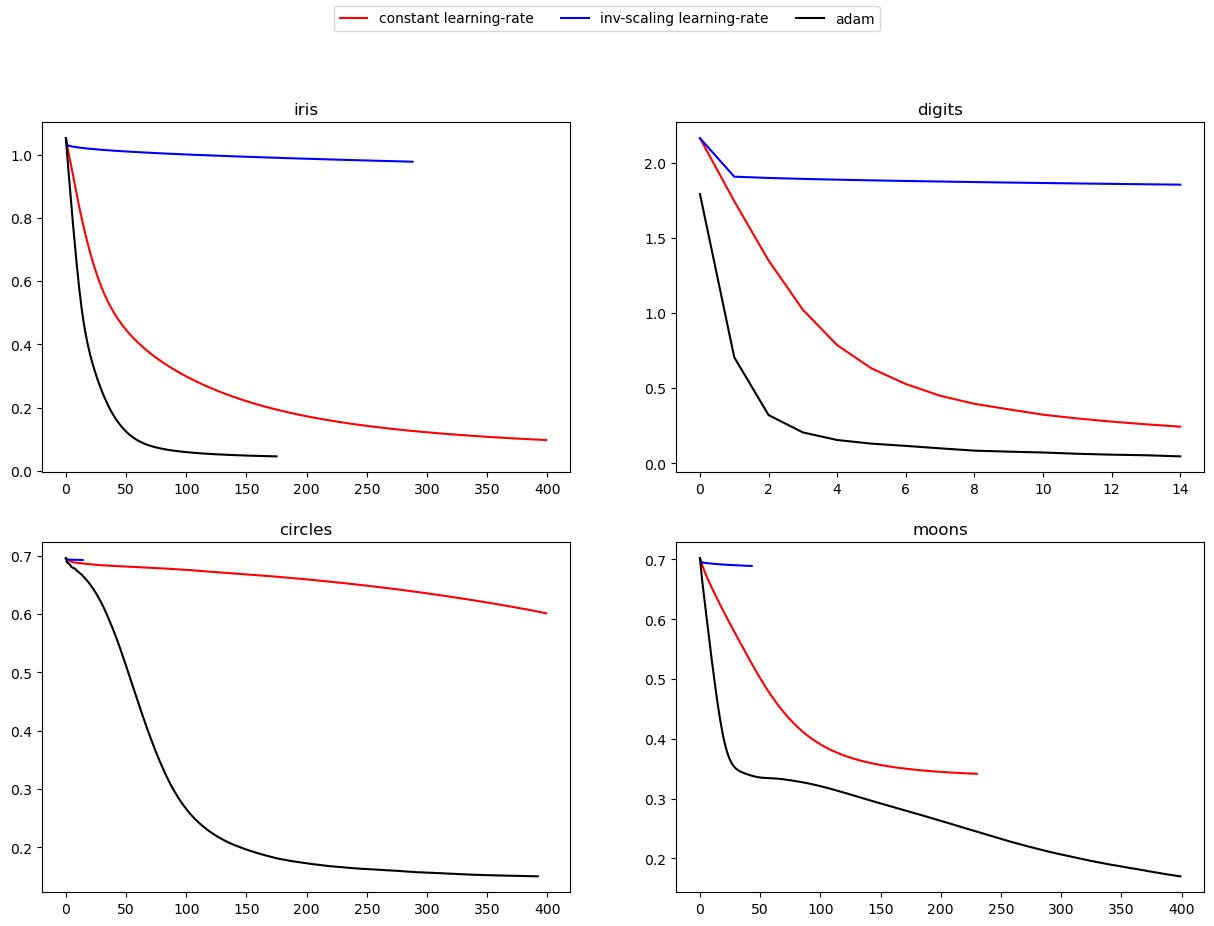

In [6]:
plot_args = [{'c' : 'red', 'linestyle' : '-'},
             {'c' : 'blue', 'linestyle' : '-'},
             {'c' : 'black', 'linestyle' : '-'}]

def plot_on_dataset(X, y, ax, name):
    ax.set_title(name)
    
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if (name == 'digits'):
        max_iter = 15
    else:
        max_iter = 400
        
    for label, param in zip(labels, params):
        mlp = MLPClassifier(random_state = 0, max_iter = max_iter, **param).fit(X, y)
        mlps.append(mlp)
        
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label = label, **args)
        
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits', 'circles', 'moons']):
    plot_on_dataset(*data, ax = ax, name = name)
    
fig.legend(ax.get_lines(), labels, ncol = 3, loc = 'upper center')
plt.show()

- 모두 'adam'에서 좋은 성능을 나타냄
- 모두 'invscaling'에서 가장 안 좋은 성능을 나타냄
- 좋은 모델의 성능은 데이터셋의 특성과 같이 튜닝하는 다른 하이퍼파라미터에 따라 달라질 수 있음
- MLP : 전역 최적화를 달성할 수 없는 만큼 랜덤성에도 영향을 받음

## 4. 다층 퍼셉트론 모델 보충 수업
### MLP 회귀 모델
- sklearn.neural_network.MLPRegressor 클래스 : MLP 회귀 모델 구현
- MLP 분류 모델과 MLP 회귀 모델은 출력층에서의 활성화 함수에서만 차이가 있을 뿐, 츨력층에 적용하는 활성화 함수는 내부에서 결정됨  
$\rightarrow$ 결과적으로 MLPRegressor 클래스는 MLPClassifier 클래스와 같은 성격의 하이퍼파라미터를 가짐

### 되새김 문제
#### 1. MLPClassifier 클래스 적용하기
- MLPClassifier 클래스를 사용하여 유방암 데이터셋을 학습하고 결과를 평가

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_breast_cancer(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- (X_train, y_train) 쌍으로 MLP 분류 모델을 학습하고 결과를 (X_test, y_test) 쌍에 적용하여 예측값을 계산한 후 재현율(recall)을 구하라.
1. 은닉층의 수는 2이며 각 은닉층의 크기는 입력층에 가까운 순으로 각각 20개와 10개로 한다.
2. 조기 종료가 가능하도록 설정하고 최대 이터레이션 수를 1,000회로 한다.
3. Adam 최적화 알고리즘을 사용한다.
4. 결과의 재현성을 위해 random_state = 1234로 설정한다.

In [9]:
from sklearn.metrics import recall_score

clf = MLPClassifier(hidden_layer_sizes = (20, 10),
                    solver = 'adam',
                    max_iter = 1000,
                    random_state = 1234,
                    early_stopping = True).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'테스트 데이터셋 재현율 : {recall_score(y_test, y_pred) * 100 : .2f}%')

테스트 데이터셋 재현율 :  94.87%


#### 2. 최적의 지도 학습 모델 탐색하기
- 다양한 모델을 이용하여 MNIST 데이터셋에 대한 가장 적절한 모델을 탐색하고 테스트 데이터셋에 적용하여 정확도를 계산

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

- 학습 데이터셋 (X_train, y_train) 쌍을 표준 스케일링한 후 LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, SVC, MLPClassifier 등 6개의 기법을 적용
- 각각에 GridSearchCV를 적용하여 최적의 하이퍼파라미터를 선출하고, 그중 성능이 가장 좋은 모델을 찾음
- 모델을 (X_test, y_test) 쌍에 적용하여 최종 정확도를 계산
- 각 기법의 하이퍼파라미터는 자유롭게 선택

In [17]:
import numpy as np
from sklearn.pipeline import Pipeline
import time
import warnings

warnings.filterwarnings('ignore')

scaler = StandardScaler()

logistic = LogisticRegression(max_iter = 10000, tol = 0.1, random_state = 1234)
DT = DecisionTreeClassifier(random_state = 1234)
RF = RandomForestClassifier(random_state = 1234, n_estimators = 200)
KNN = KNeighborsClassifier()
svc = SVC(random_state = 1234)
mlp = MLPClassifier(random_state = 1234)

logistic_param_gird = {'logistic__penalty' : ['l1', 'l2', 'elasticnet'],
                       'logistic__C' : np.logspace(-4, 4, 4)}
DT_param_grid = {'DT__max_depth' : range(1, 6),
                 'DT__ccp_alpha' : np.logspace(-6, 2, 8)}
RF_param_grid = {'RF__max_depth' : [9, 10, 11]}
KNN_param_grid = {'KNN__n_neighbors' : [2 * x + 1 for x in range(1, 10)]}
svc_param_grid = {'svc__C' : np.logspace(-4, 4, 4),
                  'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
mlp_param_grid = {'mlp__hidden_layer_sizes' : [(30, ), (20, 20), (10, 10, 10)],
                  'mlp__solver' : ['lbfgs', 'sgd', 'adam']}

search_space = [['logistic', logistic, logistic_param_gird],
                ['DT', DT, DT_param_grid],
                ['RF', RF, RF_param_grid],
                ['KNN', KNN, KNN_param_grid],
                ['svc', svc, svc_param_grid],
                ['mlp', mlp, mlp_param_grid]]

for s in search_space:
    start_time = time.time()
    pipe = Pipeline(steps = [('scaler', scaler), (s[0], s[1])])
    search = GridSearchCV(pipe, s[2])
    search.fit(X, y)
    
    print(f'모델 : {s[0]}, 소요 시간 : {time.time() - start_time : .3f}초, 탐색 결과 : {search.best_params_}, CV 점수 : {search.best_score_ : .3f}')

모델 : logistic, 소요 시간 :  0.497초, 탐색 결과 : {'logistic__C': 0.046415888336127774, 'logistic__penalty': 'l2'}, CV 점수 :  0.923
모델 : DT, 소요 시간 :  1.175초, 탐색 결과 : {'DT__ccp_alpha': 0.0026826957952797246, 'DT__max_depth': 5}, CV 점수 :  0.629
모델 : RF, 소요 시간 :  5.803초, 탐색 결과 : {'RF__max_depth': 11}, CV 점수 :  0.939
모델 : KNN, 소요 시간 :  0.740초, 탐색 결과 : {'KNN__n_neighbors': 3}, CV 점수 :  0.945
모델 : svc, 소요 시간 :  6.686초, 탐색 결과 : {'svc__C': 21.54434690031882, 'svc__kernel': 'poly'}, CV 점수 :  0.952
모델 : mlp, 소요 시간 :  24.161초, 탐색 결과 : {'mlp__hidden_layer_sizes': (30,), 'mlp__solver': 'adam'}, CV 점수 :  0.927


- 모델 대부분의 CV 점수가 0.92 이상으로 높지만, 결정 트리의 CV 점수는 0.629로, 매우 낮은 것을 확인할 수 있음
- 결정 트리는 과적합에 매우 취약하므로 단일 결정 트리를 사용하는 대신 결정 트리를 결합한 랜덤 포레스트나 GBT 등의 앙상블 기법을 사용하는 것이 좋음
- 로지스틱 회귀 모델은 구조는 단순하지만 다른 모델과 비교했을 때 0.923이라고 비교적 높은 수준의 CV 점수를 얻음
- 로지스틱 회귀 모델 자체의 우수성 때문이기도 하지만, 다른 모델의 하이퍼파라미터를 충분히 튜닝하지 못했다는 측면되 있음
- 고급 모델을 적용하더라도 튜닝이 충분하지 않으면 단순한 모델에 비해서도 좋은 성능을 기대할 수 없음을 의미  
<br><br>
- SVC 모델의 CV 점수가 가장 높음
- SVC 모델과 해당 모델의 최적 하이퍼파라미터를 이용하여 테스트 데이터셋에 대한 정확도를 산출

In [18]:
clf = SVC(C = 21.54434690031882, kernel = 'poly', random_state = 1234).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'테스트 데이터셋 정확도 : {(y_pred == y_test).mean() * 100 : .2f}%')

테스트 데이터셋 정확도 :  98.89%


- 매우 높은 정확도처럼 보이지만, MNIST 데이터셋에서는 하이퍼파라미터 튜닝을 통해 더 높은 정확도도 산출할 수 있으므로 시간이 좀 걸리더라도 다양한 하이퍼파라미터 공간을 탐색하는 것이 바람직